### Analysis of hotel demand data

#### One of the hotels (H1) is a resort hotel and the other is a city hotel (H2), in Portugal. Each observation represents a hotel booking between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.The data set includes information such as when the booking was made, length of stay, booking channel, among other things. I have tried to get insights about mainly the cancelation trends so that the hotel teams can work on them and improve the business. 
###### The dataset is taken from kaggle

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataframe and displaying first 5 rows
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Exploratory Analysis

In [3]:
# statistical description
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
# displaying all the column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# dsiplaying information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# changing datatype of reservation_status_date(now object) to datetime for ease of calculation
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB


In [7]:
# displaying the unique values in each column
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [8]:
# checking for count of null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Data Cleaning and preprocessing

In [11]:
# most of the company & agent values are null, so dropping them and other null values
df.drop(['company','agent'],axis = 1, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
# checking for outliers in the main numeric column 'adr'(average daily rate)
df['adr'].describe()

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [21]:
df['adr'].quantile(0.99)

252.0

In [13]:
# adr<0 and adr>5000 are outliers
df = df[(df['adr']<5000) & (df['adr']>0)]
df['adr'].describe()

count    116958.000000
mean        103.649070
std          46.646454
min           0.260000
25%          71.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000
mean,0.375767,105.376879,2016.161443,27.138109,15.805050,0.937687,2.522974,1.862438,0.104824,0.007866,0.027959,0.086963,0.119795,0.216505,2.347373,103.649070,0.061997,0.571273
std,0.484322,106.944356,0.706509,13.561162,8.783049,0.993329,1.885574,0.481129,0.400296,0.097102,0.164855,0.850186,1.432435,0.633569,17.712061,46.646454,0.244426,0.791495
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


In [15]:
# final preprocessed data for analysis
df.shape

(116958, 30)

In [16]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


### Data Analysis

#### Number of bookings per hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

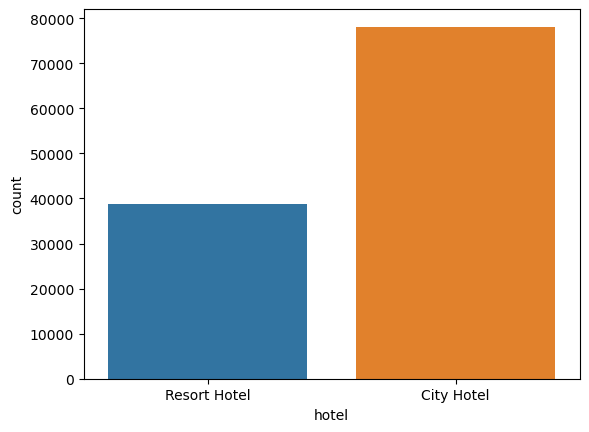

In [47]:
sns.countplot(x=df['hotel'])

#### City hotel is getting more bookings

#### Plotting Canceled and Not Canceled status against total bookings

0    0.624233
1    0.375767
Name: is_canceled, dtype: float64


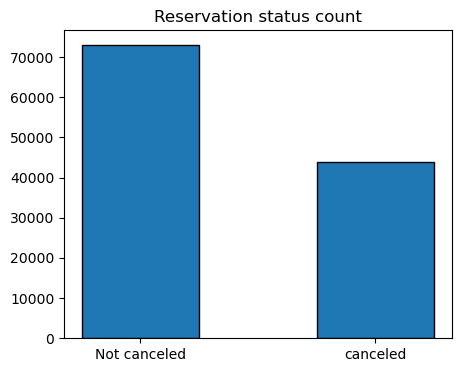

In [17]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor = 'k',width = 0.5)
plt.show()

#### The total cancelations come around more than half of not canceled bookings

#### Reservation Status in different types of hotels

Text(0, 0.5, 'number of reservations')

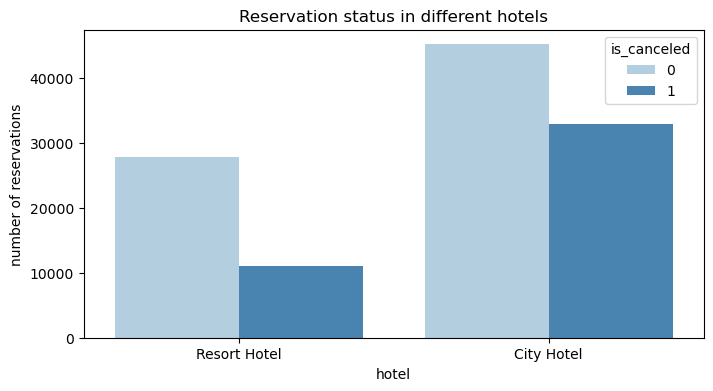

In [20]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled',data = df, palette = 'Blues')
plt.title('Reservation status in different hotels',size = 12)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

#### Average daily rates in each hotel type

In [114]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']

In [115]:
city_hotel = df[df['hotel'] == 'City Hotel']

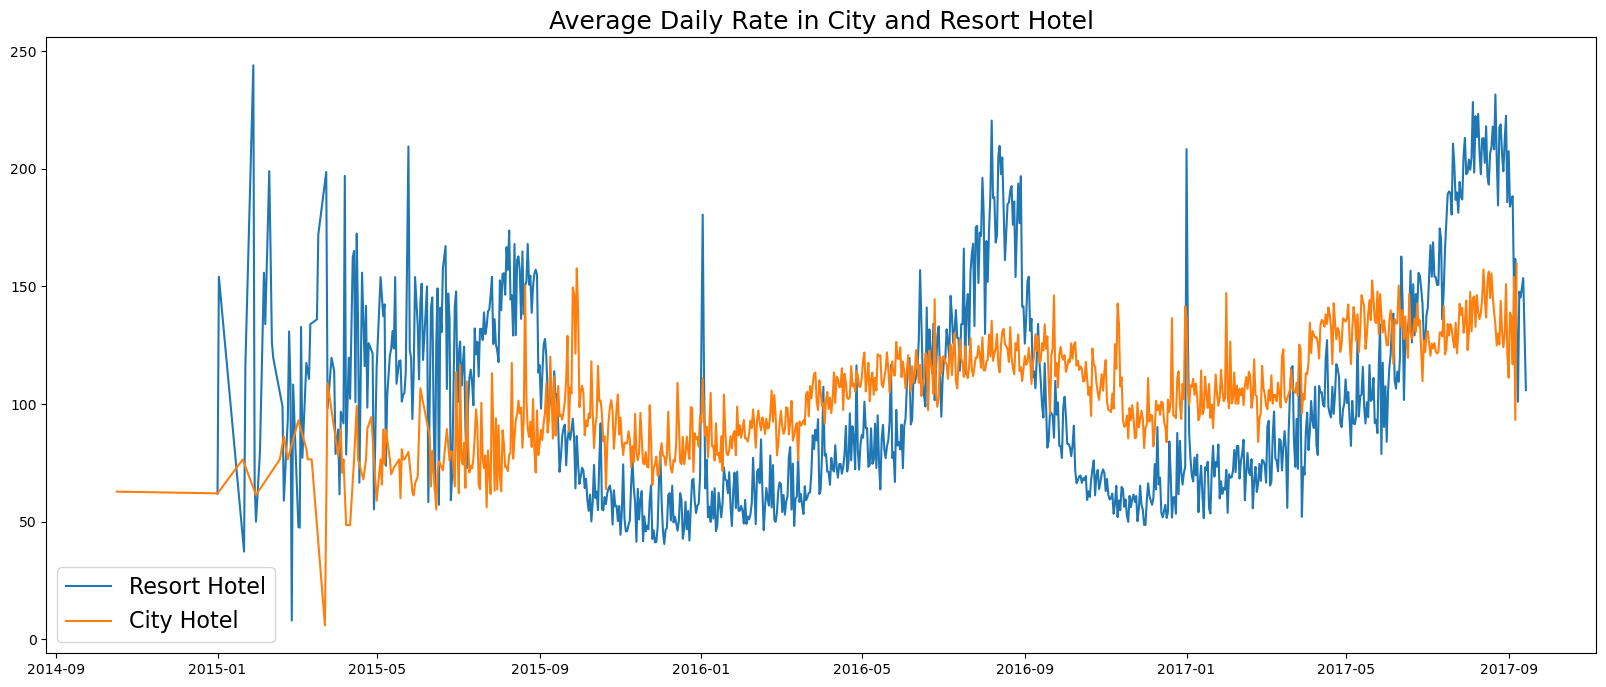

In [116]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 18)
plt.plot(resort_hotel.index,resort_hotel['adr'].values, label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'].values, label = 'City Hotel')
plt.legend(fontsize = 16)
plt.show()

#### Cancelations across years

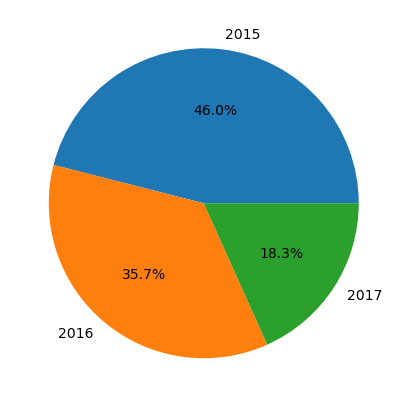

In [117]:
plt.figure(figsize=(5,7))
year = [2015,2016,2017]
count = df["arrival_date_year"][df["is_canceled"]==1].value_counts()
plt.pie(count, labels=year, autopct="%.1f%%");

#### Booking status per month

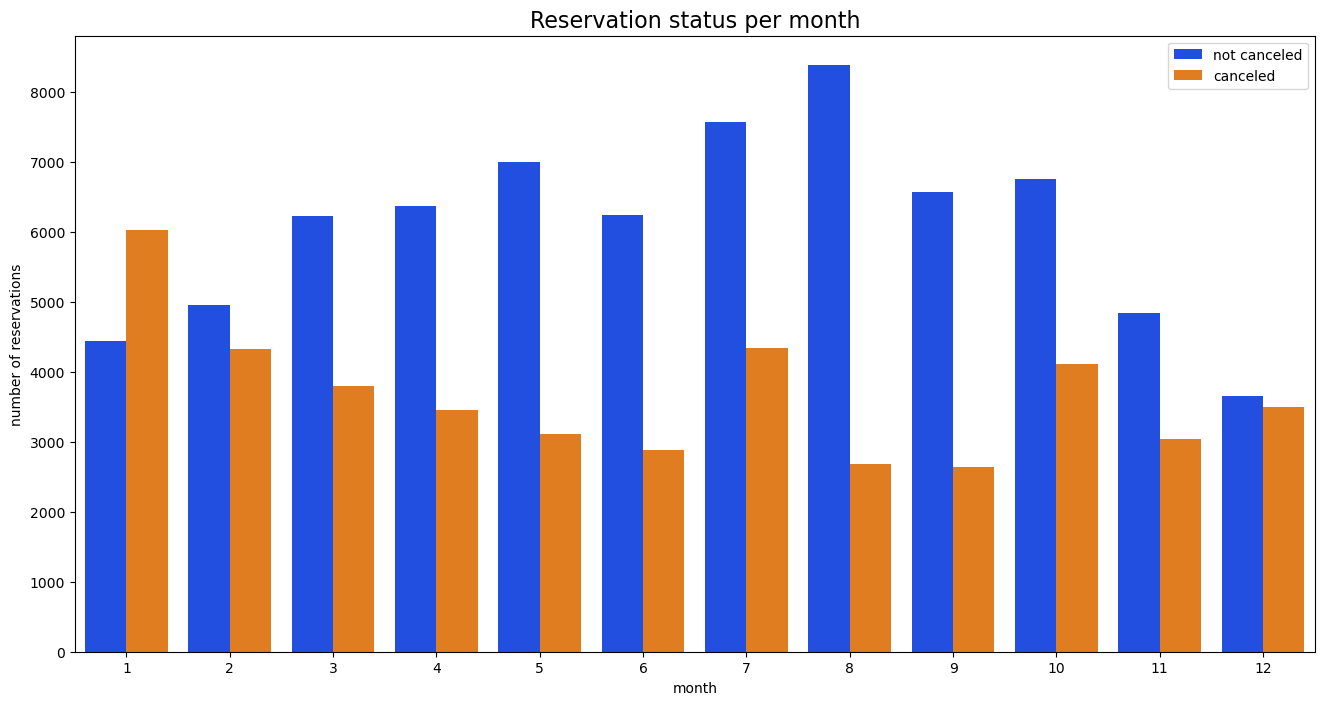

In [38]:
df['month'] =df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month',hue = 'is_canceled',data = df,palette = 'bright')
plt.title('Reservation status per month',size = 16)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

#### Top 5 countries with canceled bookings

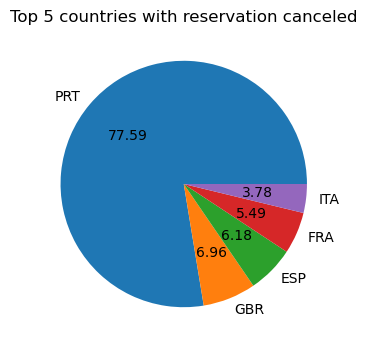

In [42]:
cancelled_data = df[df['is_canceled'] == 1]
top5 = cancelled_data['country'].value_counts()[:5]
plt.figure(figsize = (4,4))
plt.title('Top 5 countries with reservation canceled')
plt.pie(top5,autopct = '%.2f',labels = top5.index)
plt.show()

#### Bookings per market segment

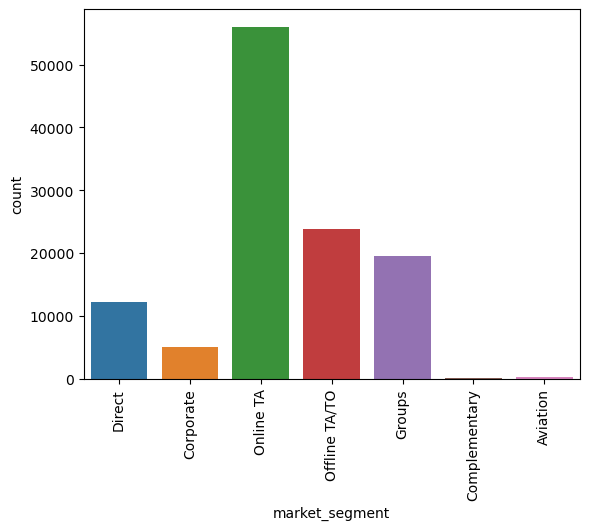

In [49]:
sns.countplot(x='market_segment',data=df)
plt.xticks(rotation=90);

#### Cancelation by market segment

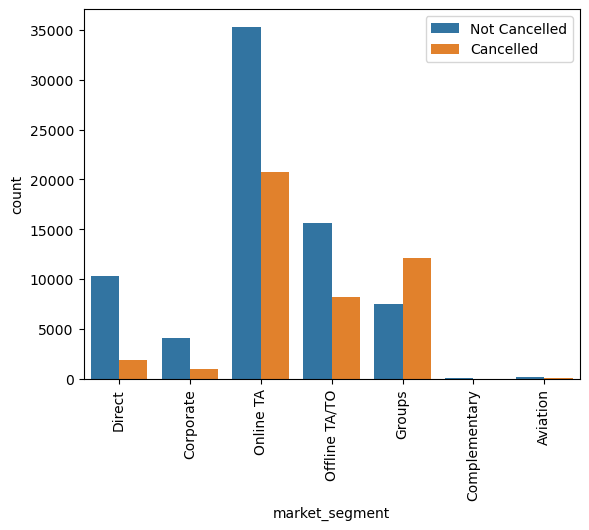

In [50]:
sns.countplot(x='market_segment',hue='is_canceled',data=df);
plt.legend(['Not Cancelled','Cancelled'])
plt.xticks(rotation=90);

#### Most preferred distribution channel

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

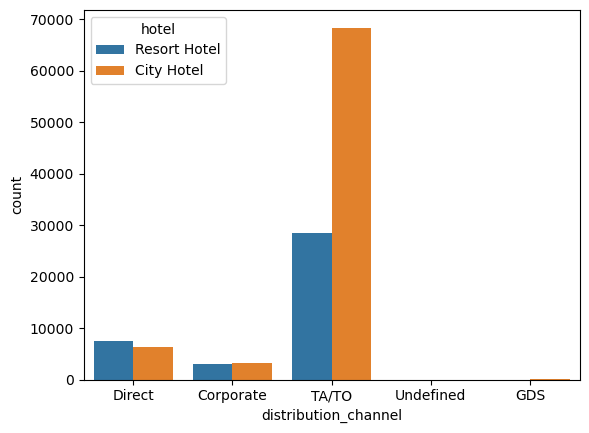

In [51]:
sns.countplot(x='distribution_channel',hue='hotel',data=df)

#### Cancelation by distribution channel

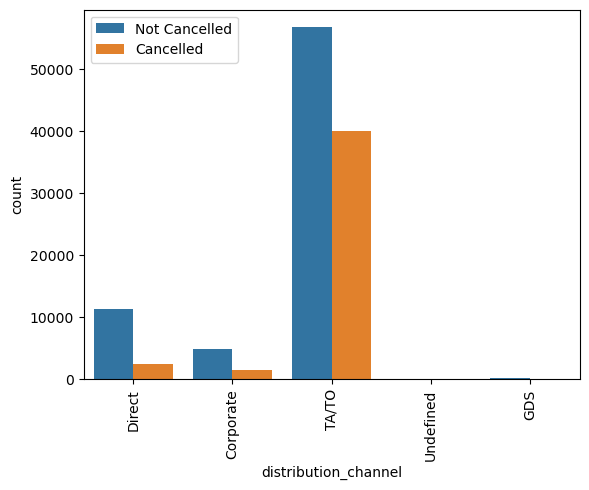

In [62]:
sns.countplot(x='distribution_channel',hue='is_canceled',data=df);
plt.legend(['Not Cancelled','Cancelled'])
plt.xticks(rotation=90);

#### Which deposite type canceled the most

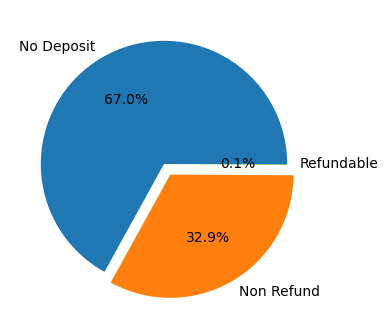

In [57]:
plt.figure(figsize=(4,4)) 
deposit = ["No Deposit","Non Refund","Refundable"]
count = df["deposit_type"][df["is_canceled"]==1].value_counts()
plt.pie(count, labels=deposit, explode=(0,0.1,0), autopct="%.1f%%");

#### In which month guest visited the most and least in each hotel

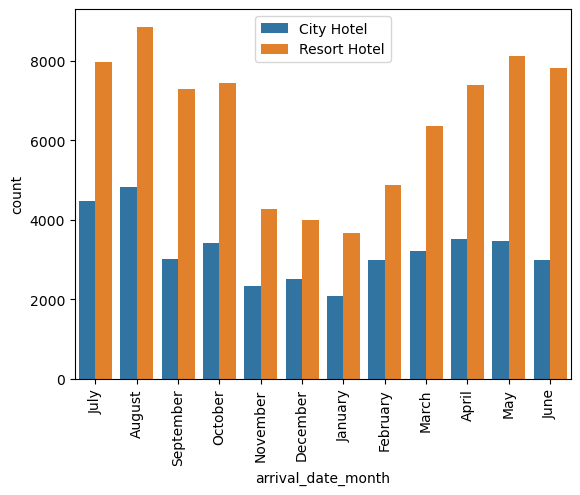

In [58]:
sns.countplot(x='arrival_date_month',hue='hotel',data=df)
plt.legend(['City Hotel','Resort Hotel'])
plt.xticks(rotation=90);

#### which year got more booking?

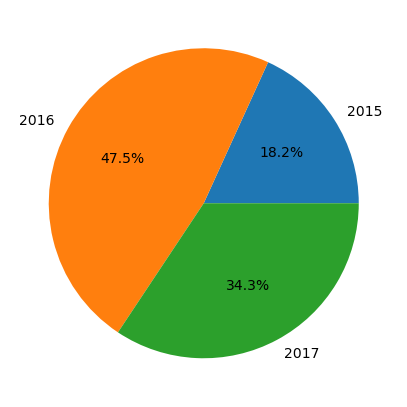

In [60]:
plt.figure(figsize=(5,7))
year = [2015,2016,2017]
counts = df.arrival_date_year.value_counts().sort_index()
plt.pie(counts, labels=year, autopct="%.1f%%");

#### Cancelation by repeated guests Vs new guest

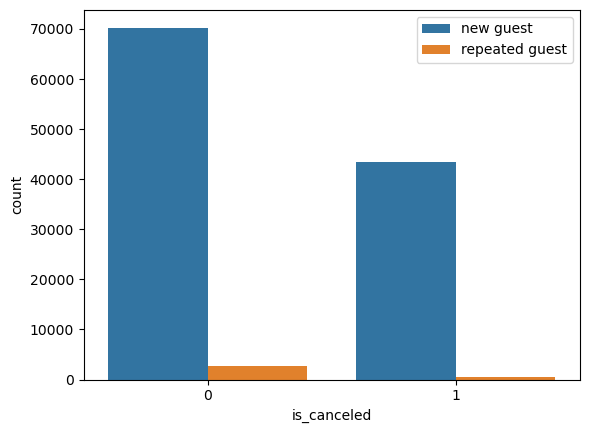

In [63]:
sns.countplot(x='is_canceled',hue='is_repeated_guest',data=df)
plt.legend(['new guest','repeated guest'])